In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib notebook

## Get Dataset

In [2]:
data = pd.read_csv('data/boston_housing.csv')
with open('data/readme.txt', 'r') as f:
    lines = f.readlines()
    for line in lines:
        print(line)
data.head()

Variables:

- CRIM per capita crime rate by town

- ZN proportion of residential land zoned for lots over 25,000 sq.ft.

- INDUS proportion of non-retail business acres per town

- CHAS Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)

- NOX nitric oxides concentration (parts per 10 million)

- RM average number of rooms per dwelling

- AGE proportion of owner-occupied units built prior to 1940

- DIS weighted distances to five Boston employment centres

- RAD index of accessibility to radial highways

- TAX full-value property-tax rate per $10,000

- PTRATIO pupil-teacher ratio by town

- B 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town

- LSTAT % lower status of the population

- MEDV Median value of owner-occupied homes in $1000's


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


## Preprocess Data

In [3]:
# Check missing values
features = data.columns[:-1]
target = data.columns[-1]
for feature in features:
    print(feature, ':', data[feature].isnull().any())

CRIM : False
ZN : False
INDUS : False
CHAS : False
NOX : False
RM : False
AGE : False
DIS : False
RAD : False
TAX : False
PTRATIO : False
B : False
LSTAT : False


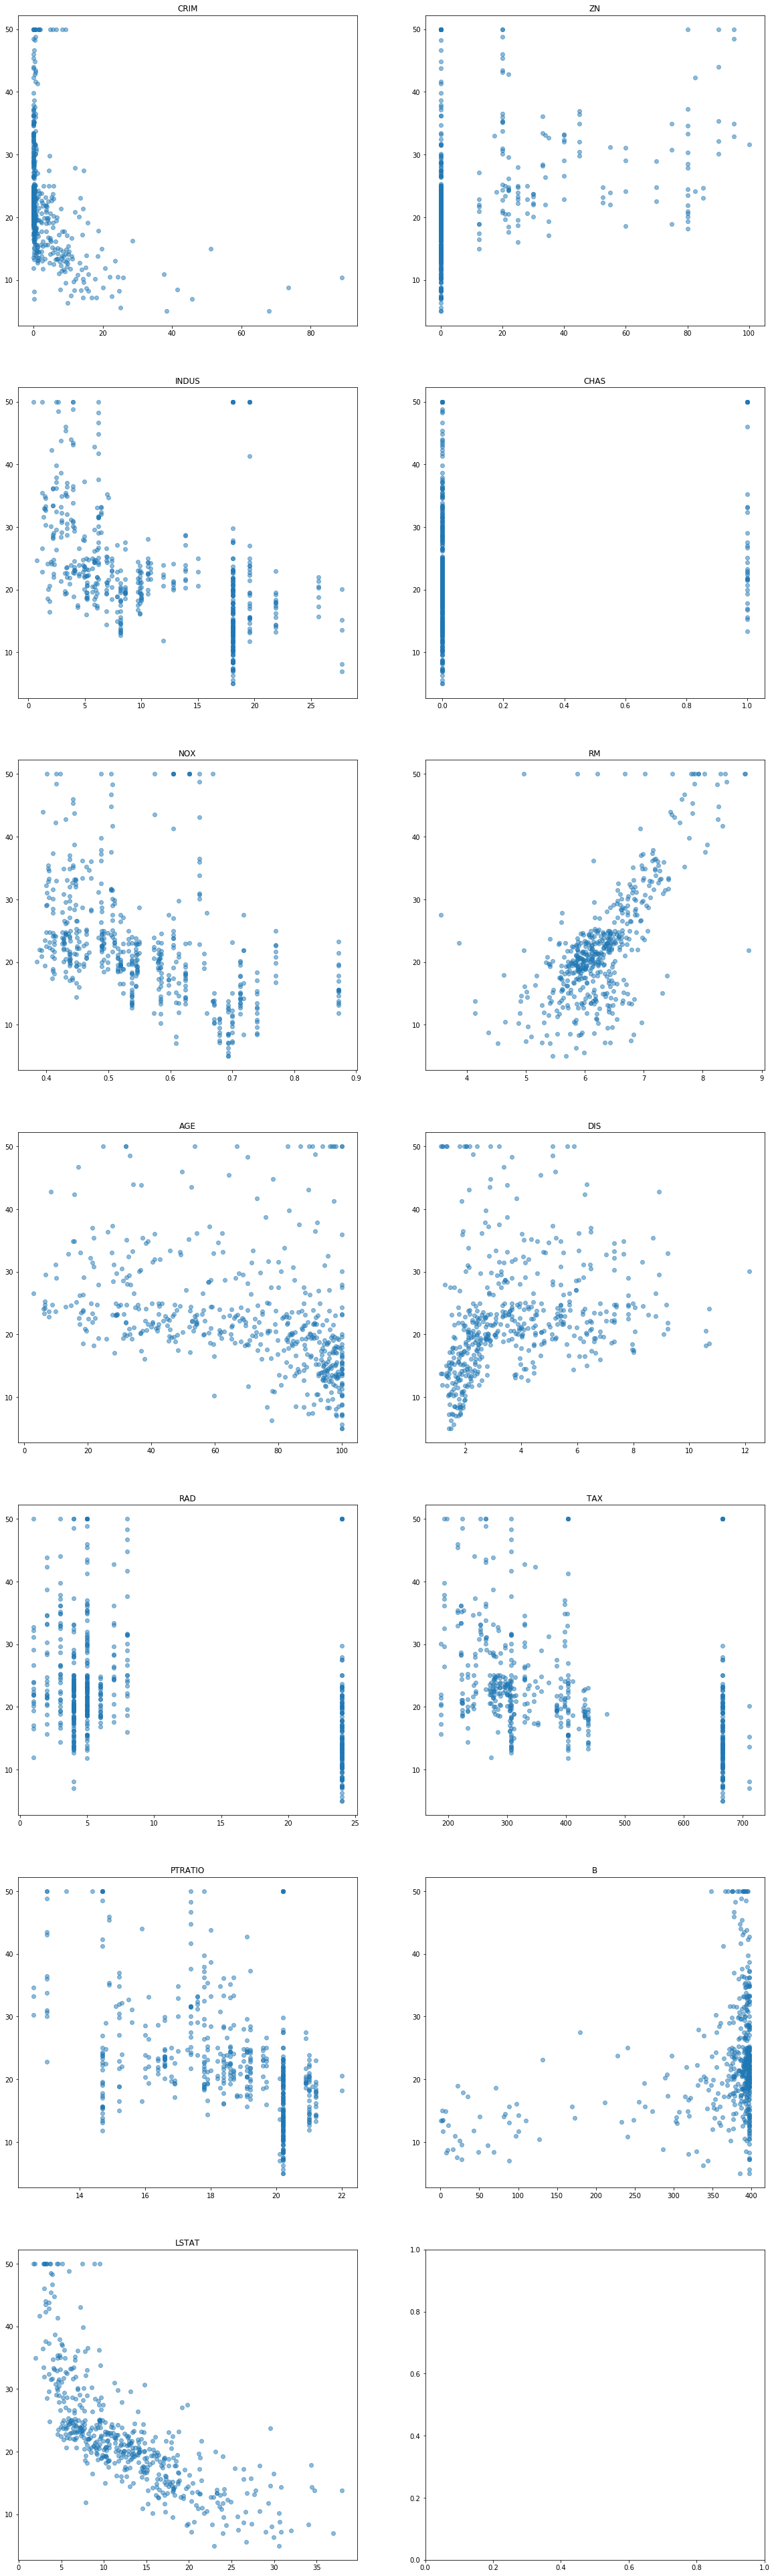

In [4]:
# Plot pair of feature and target
fig, axs = plt.subplots(int(13/2)+1, 2, figsize=(20, 70))
for i, feature in enumerate(features):
    axs[int(i/2),i%2].set_title(feature)
    axs[int(i/2),i%2].scatter(data[feature], data[target], alpha=0.5)
plt.show()

In [5]:
# Correlation
corr = data.corr()
corr[target].abs().sort_values(ascending=False)[1:]

LSTAT      0.737663
RM         0.695360
PTRATIO    0.507787
INDUS      0.483725
TAX        0.468536
NOX        0.427321
CRIM       0.388305
RAD        0.381626
AGE        0.376955
ZN         0.360445
B          0.333461
DIS        0.249929
CHAS       0.175260
Name: MEDV, dtype: float64

## Train model

In [6]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

X_train, X_test, y_train, y_test = train_test_split(data[features], data[target], test_size=0.2, random_state=42)
reg = LinearRegression().fit(X_train, y_train)
y_pred = reg.predict(X_test)
result = {}
result['mse'] = mean_squared_error(y_test, y_pred)
result['r2'] = r2_score(y_test, y_pred)
result['mae'] = mean_absolute_error(y_test, y_pred)
print(result)

{'mse': 24.291119474973545, 'r2': 0.6687594935356316, 'mae': 3.189091965887854}


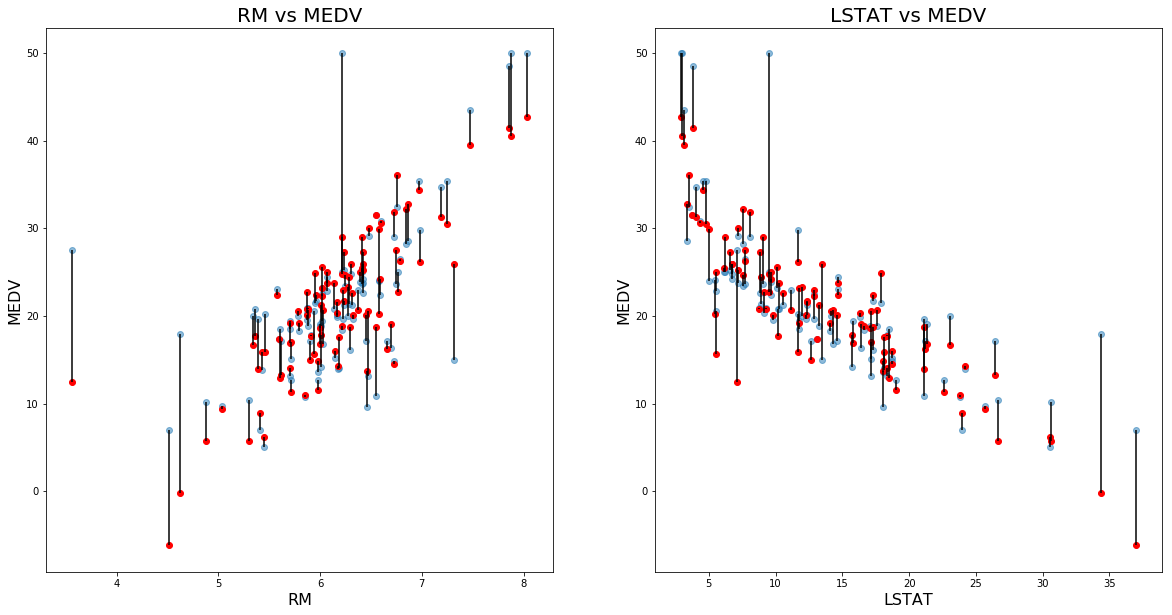

In [7]:
selected_features = ['RM', 'LSTAT']
fig, axs = plt.subplots(1, 2, figsize=(20, 10))
y_min = [min(test, pred) for test, pred in zip(y_test, y_pred)]
y_max = [max(test, pred) for test, pred in zip(y_test, y_pred)]
for i, feature in enumerate(selected_features):
    axs[i%2].set_title(feature+' vs '+target, fontsize=20)
    axs[i%2].scatter(X_test[feature], y_test, alpha=0.5)
    axs[i%2].scatter(X_test[feature],y_pred,color='red')
    axs[i%2].vlines(X_test[feature], ymin=y_min, ymax=y_max)
    axs[i%2].set_xlabel(feature, fontsize=16)
    axs[i%2].set_ylabel(target, fontsize=16)
plt.show()

## Improve model

In [8]:
# Add new features
data['log_DIS'] = data['DIS'].apply(lambda x: np.log(x)) # pretty effective
data['1/LSTAT'] = data['LSTAT'].apply(lambda x: 1/x) # very effective
data['1/negAGE'] = data['AGE'].apply(lambda x: 1/-x) # a bit

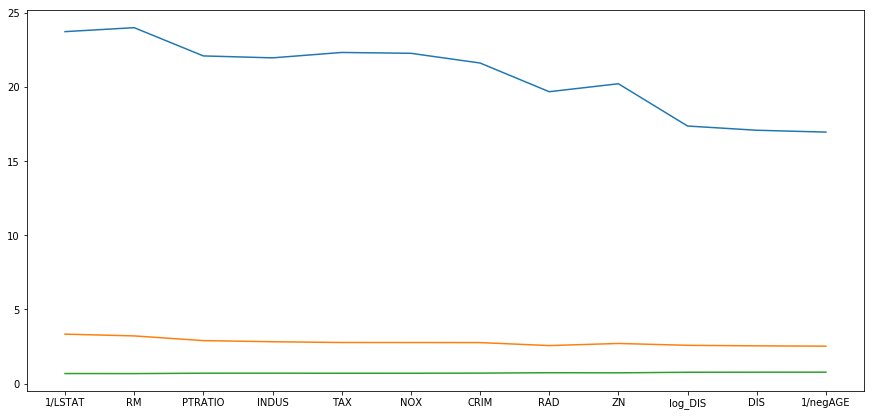

In [9]:
# Select features
corr = data.corr()
features = list(corr[target].abs().sort_values(ascending=False)[1:].index)
removed_features=['LSTAT','CHAS','AGE','B']
for feat in removed_features:
    features.remove(feat)
selected_features = []
lst_mse = []
lst_r2 = []
lst_mae = []
for feature in features:
    selected_features.append(feature)
    # Train model
    X_train, X_test, y_train, y_test = train_test_split(data[selected_features], data[target], test_size=0.2, random_state=42)
    reg = LinearRegression().fit(X_train, y_train)
    y_pred = reg.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    lst_mse.append(mse)
    lst_r2.append(r2)
    lst_mae.append(mae)

plt.figure(figsize=(15,7))
plt.plot(lst_mse)
plt.plot(lst_mae)
plt.plot(lst_r2)
plt.xticks(ticks=range(len(features)), labels=features)
plt.show()

{'mse': 16.965983581203247, 'r2': 0.76864709755786, 'mae': 2.52342115659171}


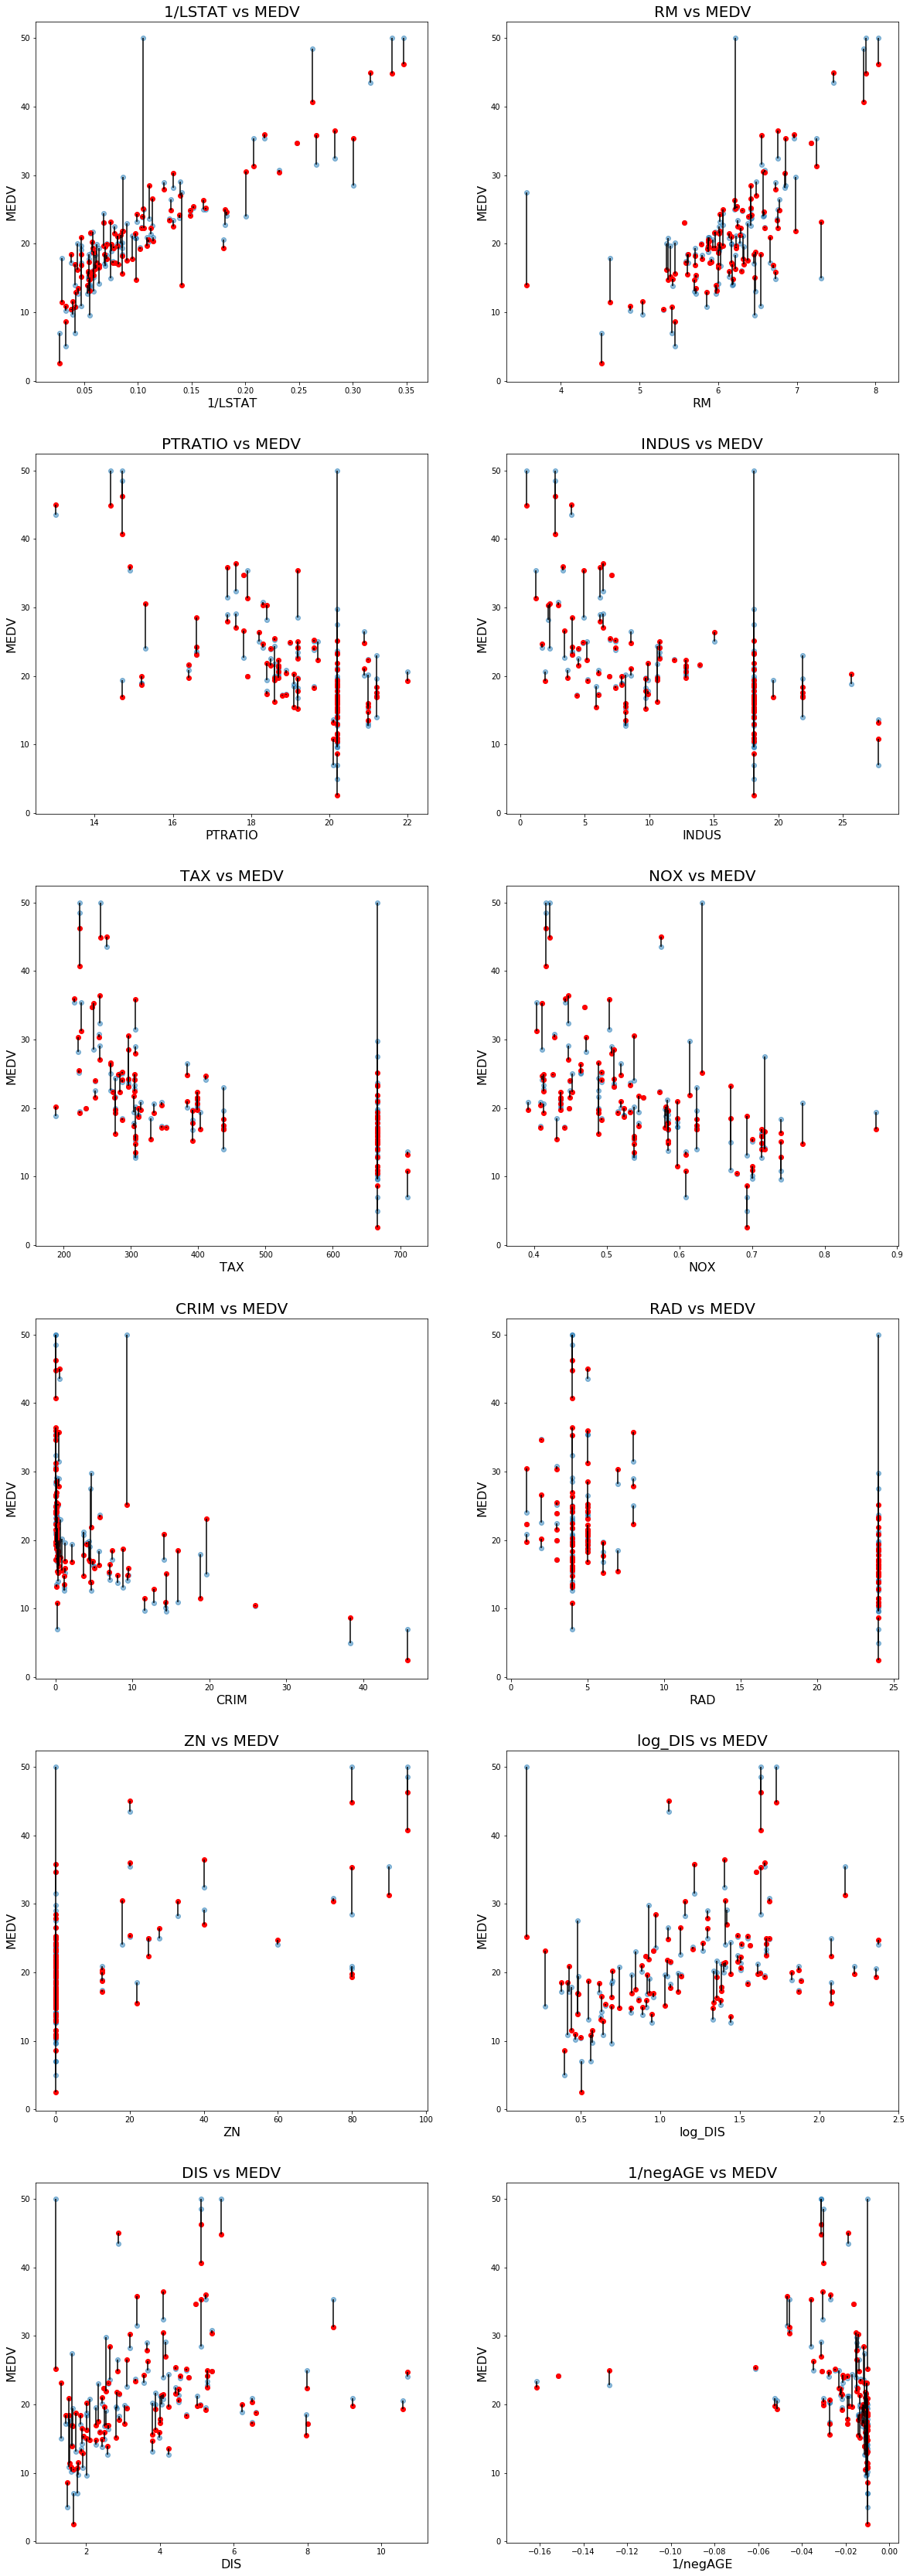

In [11]:
num_features = len(selected_features)
num_rows = int(num_features/2)

X_train, X_test, y_train, y_test = train_test_split(data[selected_features], data[target], test_size=0.2, random_state=42)
reg = LinearRegression().fit(X_train, y_train)
result = {}
result['mse'] = mean_squared_error(y_test, y_pred)
result['r2'] = r2_score(y_test, y_pred)
result['mae'] = mean_absolute_error(y_test, y_pred)
print(result)

y_min = [min(test, pred) for test, pred in zip(y_test, y_pred)]
y_max = [max(test, pred) for test, pred in zip(y_test, y_pred)]

fig, axs = plt.subplots(num_rows, 2, figsize=(20, 10*num_rows))
for i, feature in enumerate(selected_features):
    y_pred = reg.predict(X_test)
    axs[int(i/2),i%2].set_title(feature+' vs '+target, fontsize=20)
    axs[int(i/2),i%2].scatter(X_test[feature], y_test, alpha=0.5)
    axs[int(i/2),i%2].scatter(X_test[feature],y_pred, color='red')
    axs[int(i/2),i%2].vlines(X_test[feature], ymin=y_min, ymax=y_max)
    axs[int(i/2),i%2].set_xlabel(feature, fontsize=16)
    axs[int(i/2),i%2].set_ylabel(target, fontsize=16)
plt.show()